# BL40A2020 Wireless Communication Systems

## Assignment  week 4: Probability theory and random processes

## Author: Eero Suomalainen

### 1. Follow similar steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%204/week4.ipynb) to analyze the *[Binary erasure channel](https://komm.readthedocs.io/en/latest/komm.BinaryErasureChannel/)* 

![](https://upload.wikimedia.org/wikipedia/commons/b/b6/Binary_erasure_channel.svg)

**(a) Consider that the probabilities related to the input sequence is the following:**
- $q$ is the probability that the input bit is $0$ 
- $1-q$ is the probability that the input bit is $1$.

**Compute analytically (as a function of $p$ and $q$):**
- Probability that the output is $e$
- Probability that the input is $0$ if the output is $e$ (error)
- Probability that the input is $1$ if the output is $e$ (error)

- Pr[transmit 0] = $q$
- Pr[transmit 1] = $1-q$
- Pr[receive 0 | transmit 0] = $1-p$
- Pr[receive e | transmit 0] = $p$
- Pr[receive 1 | transmit 1] = $1-p$
- Pr[receive e | transmit 1] = $p$

**Answer**
- Pr[receive e] = 1 - (Pr[receive 0 | transmit 0] x Pr[transmit 0] + Pr[receive 1 | transmit 1] x Pr[transmit 1]) = $1 - ((1-p)*q+(1-p)*(1-q))$ = $1 - (q-pq+1-q-p+pq)$ = $p$
- Pr[transmit 0] = Pr[receive e] - Pr[receive e | transmit 1] x Pr[transmit 1] = $p - p*(q-1)$ = $2p-pq$
- Pr[transmit 1] = Pr[receive e] - Pr[receive e | transmit 0] x Pr[transmit 0] = $p - p*q$ = $p-pq$

**(b) Test the analytical results via simulation (see tutorial) considering that $p=0.1$ and $q=0.4$**

In [1]:
! pip install komm
! pip install sympy
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 3.5 MB/s eta 0:00:0000:0100:01
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56590 sha256=b258e1e1b2993a207707c68c62620ee7fd6ef8bb9457da271303348f61672cea
  Stored in directory: /home/jovyan/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built komm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 M

In [6]:
import math
import komm
import sympy as sp
sp.init_printing()
from sympy.stats import Normal, density, E, std, cdf
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

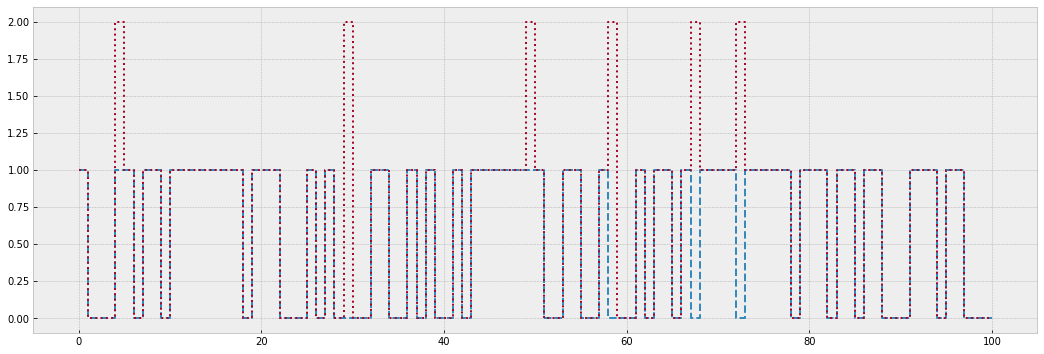

In [4]:
input_seq_size = 100 # sequence
tp = np.arange(0, input_seq_size , 1)
tp_plot = np.arange(0, input_seq_size +1, 1)
p_aux = 0.4 # q 
input_seq = np.random.choice([0, 1], size=input_seq_size, p=[p_aux, 1-p_aux])
input_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])
p = 0.1
bec = komm.BinaryErasureChannel(p)
output_seq = bec(input_seq)
output_seq_plot = np.append(output_seq,output_seq[input_seq_size-1])
plt.rcParams['figure.figsize'] = 18, 6
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--');
plt.step(tp_plot ,output_seq_plot,where='post',linestyle=':');

In [5]:
p_r0 = (1-p)*p_aux
p_r1 = (1-p)*(1-p_aux)
p_re = 1-(p_r0+p_r1)
p_t0_re = 2*p-p*p_aux
p_t1_re = p-p*p_aux
num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()
num_zeros_bec = (output_seq== 0).sum()
num_ones_bec = (output_seq == 1).sum()
num_e_bec = 100 - (num_zeros_bec+num_ones_bec)
print("Simulation vs. analytical results")
print("#################")
print("Input")
print("Probability input 0", num_zeros/input_seq_size, "Analytical:", p_aux)
print("Probability input 1:", num_ones/input_seq_size, "Analytical:", 1 - p_aux)
print("#################")
print("Output")
print("Probability output 0:", num_zeros_bec/input_seq_size, "Analytical:", p_r0)
print("Probability output 1:",num_ones_bec/input_seq_size, "Analytical:", p_r1)
print("Probability output e:",num_e_bec/input_seq_size, "Analytical:", p_re)
print("#################")
print("Error probability due to channel")
count_e_1 = 0
count_e_0 = 0
for i in range(input_seq_size):
    if output_seq[i] == 2:
        if input_seq[i] == 0:
            count_e_1 = count_e_1 +1
        if input_seq[i] == 1:
            count_e_0 = count_e_0 +1
print("Probability output e given input 1:",count_e_1/num_zeros, "Analytical:", p)
print("Probability output e given input 0:",count_e_0/num_ones, "Analytical:", p)
count_out2_in1 = 0
count_out2_in0  = 0
for i in range(input_seq_size):
    if output_seq[i] == 2:
        if input_seq[i] == 1:        
            count_out2_in1 = count_out2_in1 + 1
    if output_seq[i] == 2:
        if input_seq[i] == 0: 
            count_out2_in0 = count_out2_in0  + 1            
print("#################")
print("Conditional probabilities")   
print("Probability for input 0")   
print("Probability input 0 given output 0:",1 - count_out2_in1/num_zeros_bec, "Analytical:", 1-p_t0_re)
print("Probability input 0 given output e:",count_out2_in1/num_zeros_bec, "Analytical:", p_t0_re)            
print("Probability for input 1")            
print("Probability input 1 given output 1:", 1 - count_out2_in0 /num_ones_bec, "Analytical:", 1-p_t1_re)
print("Probability input 1 given output e:", count_out2_in0 /num_ones_bec, "Analytical:", p_t1_re)

Simulation vs. analytical results
#################
Input
Probability input 0 0.41 Analytical: 0.4
Probability input 1: 0.59 Analytical: 0.6
#################
Output
Probability output 0: 0.37 Analytical: 0.36000000000000004
Probability output 1: 0.57 Analytical: 0.54
Probability output e: 0.06 Analytical: 0.09999999999999987
#################
Error probability due to channel
Probability output e given input 1: 0.0975609756097561 Analytical: 0.1
Probability output e given input 0: 0.03389830508474576 Analytical: 0.1
#################
Conditional probabilities
Probability for input 0
Probability input 0 given output 0: 0.9459459459459459 Analytical: 0.84
Probability input 0 given output e: 0.05405405405405406 Analytical: 0.16
Probability for input 1
Probability input 1 given output 1: 0.9298245614035088 Analytical: 0.94
Probability input 1 given output e: 0.07017543859649122 Analytical: 0.06


**2. Consider two independent Gaussian random variables so that**
- $X$ has mean $\mu_X$ and variance $\sigma_X^2$
- $Y$ has mean $\mu_Y$ and variance $\sigma_Y^2$

**Consider a new random variable so that: $Z =  X + Y$. If $X$ and $Y$ are independent Gaussian random variables, then $\mu_Z = \mu_X +\mu_Y$ and variance $\sigma_Z^2 = \sigma_X^2 +\sigma_Y^2$. Plot the probaility density function and the cumulative density function of $X, Y, Z$ considering that**
- $\mu_X=10$ and $\sigma_X^2=1$
- $\mu_Y=2$ and $\sigma_Y^2=3$

**How is the shape of this ditribution in relation to the original ones?**

In [43]:
mu = sp.Symbol("mu")
muX = sp.Symbol("mu_X")
muY = sp.Symbol("mu_Y")
muZ = sp.Symbol("mu_Z")
sigma = sp.Symbol("sigma", positive=True)
sigmaX = sp.Symbol("sigma_X", positive=True)
sigmaY = sp.Symbol("sigma_Y", positive=True)
sigmaZ = sp.Symbol("sigma_Z", positive=True)
t = sp.Symbol("t")
X = sp.stats.Normal("x", muX, sigmaX)
Y = sp.stats.Normal("y", muY, sigmaY)
Z = sp.stats.Normal("z", muZ, sigmaZ)

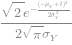

In [44]:
fX=density(X)(t)
fY=density(Y)(t)
fZ=density(X+Y)(t)
fY

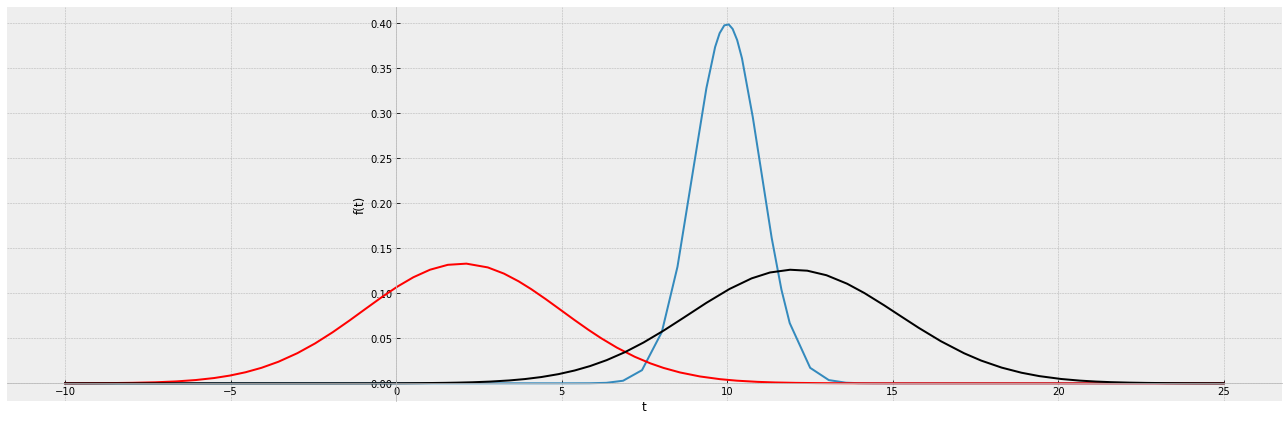

In [56]:
aux_plot= sp.plot(fX.subs(sigmaX,1).subs(muX,10), fY.subs(sigmaY,3).subs(muY,2), fZ.subs(sigmaX,1).subs(muX,10).subs(sigmaY,3).subs(muY,2), (t, -10, 25), show=False);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'k'
aux_plot.show()

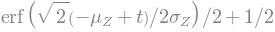

In [53]:
CX = cdf(X)(t)
CY = cdf(Y)(t)
CZ = cdf(Z)(t)
CZ

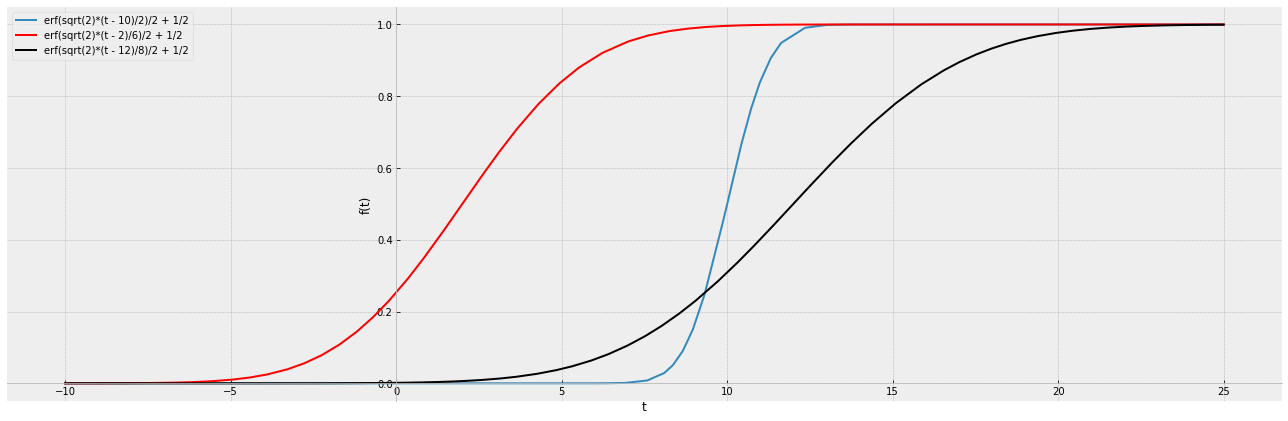

In [54]:
aux_plot= sp.plot(CX.subs(sigmaX,1).subs(muX,10), CY.subs(sigmaY,3).subs(muY,2), CZ.subs(sigmaZ,4).subs(muZ,12), (t, -10, 25), show=False, legend=True);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'k'
aux_plot.show()

As Z is sum of X and Y it has larger mean and variance. This suggest that Z is expected to have greater value than X or Y. In pdf this is shown by Z (black line) having its "curve" later than X or Y. In cdf Z is still growing after others have stopped.